PROBLEM STATEMENT

I am a data science consultant for the spotify and I have been provided with the dataset named "data.csv" and have been provided with some business questions so here I am building an explanatory data analysis pipeline. This dataset maily provide various informations which can be identified and predict the users preferences.

https://www.kaggle.com/datasets/vatsalmavani/spotify-dataset
The dataset from this public page is used for my project. The file named data.csv is the dataset i have used.

In [1]:
import pandas as pd #to  import pandas library and assign as pd
import matplotlib.pyplot as plt #to import the pyplot module from matplotlib library and assign it as plt
import seaborn as sns #to import the seaborn library and assign it as sns
from sklearn.model_selection import train_test_split #timports train_test_split function from model_selection module of sklearn
from sklearn.linear_model import LinearRegression #imports the LinearRegression class from the linear_model module in sklearn

DATA COLLECTION AND EXPLORATION

In [2]:
df = pd.read_csv(r'C:\Users\USER\Downloads\data.csv') #to import file and assign as df
df

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055


In [10]:
df1 = df.copy() #makes copy of df as df1
df1 = df1.head(1000) #to take only first 500 rows for better identification of dataframe
df1

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.9820,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.7320,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.9610,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.9670,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.9570,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.4660,1926,0.5090,"['Georgette Heyer', 'Irina Salkow']",0.756,118532,0.184,0,0BjtCwfDH15trQGxhUwwxT,0.000000,5,0.197,-22.445,1,Kapitel 358 - Der Page und die Herzogin,1,1926,0.9430,103.189
996,0.5530,1926,0.9960,['Francisco Canaro'],0.454,187693,0.541,0,0CdWVv6HzPxVy0UNLmC3Wz,0.958000,3,0.702,-14.280,0,La Piba Del Tabaris - Remasterizado,0,1926-07-12,0.8590,67.332
997,0.3850,1926,0.0977,['Эрнест Хемингуэй'],0.681,103000,0.304,1,0E34NDoA5tFsksVokrmFo1,0.000000,9,0.140,-15.338,1,Часть 81.3 - Фиеста,0,1926,0.9540,83.944
998,0.4120,1926,0.6230,"['Georgette Heyer', 'Irina Salkow']",0.623,129790,0.144,0,0ESV6VtxZY3DVei945FjXa,0.000000,0,0.240,-21.117,1,Kapitel 341 - Der Page und die Herzogin,1,1926,0.9370,76.790


DATA PREPROCESSING

In [11]:
columns_to_drop = ['artists', 'duration_ms', 'explicit', 'id', 'key', 'mode', 'release_date'] #to drop some un important columns 
df1 = df1.drop(columns = columns_to_drop) #to make the df1 with only the balance columns
df1

,valence,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,name,popularity,speechiness,tempo
0,0.0594,1921,0.9820,0.279,0.211,0.878000,0.665,-20.096,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,0.0366,80.954
1,0.9630,1921,0.7320,0.819,0.341,0.000000,0.160,-12.441,Clancy Lowered the Boom,5,0.4150,60.936
2,0.0394,1921,0.9610,0.328,0.166,0.913000,0.101,-14.850,Gati Bali,5,0.0339,110.339
3,0.1650,1921,0.9670,0.275,0.309,0.000028,0.381,-9.316,Danny Boy,3,0.0354,100.109
4,0.2530,1921,0.9570,0.418,0.193,0.000002,0.229,-10.096,When Irish Eyes Are Smiling,2,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.4660,1926,0.5090,0.756,0.184,0.000000,0.197,-22.445,Kapitel 358 - Der Page und die Herzogin,1,0.9430,103.189
996,0.5530,1926,0.9960,0.454,0.541,0.958000,0.702,-14.280,La Piba Del Tabaris - Remasterizado,0,0.8590,67.332
997,0.3850,1926,0.0977,0.681,0.304,0.000000,0.140,-15.338,Часть 81.3 - Фиеста,0,0.9540,83.944
998,0.4120,1926,0.6230,0.623,0.144,0.000000,0.240,-21.117,Kapitel 341 - Der Page und die Herzogin,1,0.9370,76.790


In [12]:
duplicate = df1.duplicated().sum() #to check for duplicate rows
print("Duplicate rows:",duplicate) #to print the duplicate columns number if there is any

Duplicate rows: 0


In [13]:
missing_values = df1.isnull().sum() #to check for any missing values in the column
print("Missing values:\n", missing_values) #to print the no.of missing values

Missing values:
 valence             0
year                0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
name                0
popularity          0
speechiness         0
tempo               0
dtype: int64


In [14]:
data_types = df1.dtypes #to find the data types of each column
print("Data types:\n", data_types) #to display the columns and data types

Data types:
 valence             float64
year                  int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
name                 object
popularity            int64
speechiness         float64
tempo               float64
dtype: object


In [15]:
print(df1.describe())#t0.000000  1921.000000      0.000065      0.000000     0.001760   
25%       0.451000  o print the describtion of the dataset after clening

           valence         year  acousticness  danceability       energy  \
count  1000.000000  1000.000000   1000.000000   1000.000000  1000.000000   
mean      0.599232  1923.811000      0.920235      0.561521     0.273017   
std       0.236957     1.661939      0.172337      0.159483     0.147396   
min       0.000000  1921.000000      0.000065      0.000000     0.001760   
25%       0.451000  1923.000000      0.941000      0.452500     0.162000   
50%       0.626500  1924.000000      0.987000      0.583000     0.262000   
75%       0.787500  1925.000000      0.995000      0.686000     0.353250   
max       0.970000  1926.000000      0.996000      0.934000     0.947000   

       instrumentalness     liveness     loudness   popularity  speechiness  \
count       1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean           0.418001     0.224384   -15.071920     3.415000     0.118004   
std            0.409337     0.177350     5.001726     5.970462     0.156486   

BUSINESS QUESTIONS AND VISUALIZATION


1.How is the relationship between danceability and energy of the music engages the user to stream on the platform, by using this how can the platform benefit from this? 

The python code I have written here is to represent the answer of this question by a visualization, for that here I have used the "sns.barplot" to present a barchart to find the relationship between the danceability and energy. for that chart I have assigned a chart size which is "200,100". Then the sns librarys bar chart is defined and given x and y variables. Then i gave a title for the chart using "plt.title", then x and y labels are given. "plt.xticks" is used to rotate the x values 90 degree for better viewing and then "plt.show is used for displaying the chart. 

This bar chart gives the visalisation of the relationship between danceibility and energy in this dataset. By this we gets a representation of how the users response to the songs that are suggested to them by their interest in songs which have high danceiability and energy. This relationship is one of the most crutial data for a platform like spotify to improve their user engagemant on the platform.
Analysing this chart it derives that the streaming platforms major operations ,content recommendation algorithms, playlists and targeted marketing efforts. This gives a leverage to the platform for creating a personal playlist prefernces and by that enhance the user satisfaction. 

In [16]:
plt.figure(figsize = (200,100)) #fixes the gimention of thr chart to (200,100)
sns.barplot(data=df1, x='danceability', y='energy') #uses sns library to create barchart with x-axis danceability and y-axis energy
plt.title('Relationship between danceability and energy') #gives the titles for the chart "Relationship between danceability abd energy"
plt.xlabel('Danceability') #gives the x axis name "Danceability"
plt.ylabel('Energy') #gives the y-axis name "Energy"
plt.xticks(rotation=90) #rotates the values in the x-axis for better visualisation
plt.show() #to show the chart with given properties 

2.Is the valence of the music tracks affect the average popularity, and how does this help the their streaming platforms?

Valence and popularity is grouped and assigned as "average_popularity_by_valence". The size of the chart is assigned using "plt.figure". To plot the graph of this "sns.barplot" is used, and xaxis and yaxis are assigned also "coolwarm" is given for colour. using "plt.title" title is assigned. Using "plt.xlabel" and "plt.ylabel" label is given. "plt.xticks" is used for better viewing the values in the xaxis. plt.show() is used for displaying.

This bar chart represents the average popularity of the songs across different levels of valence. Valency can be said as the muaical positivity conveyed by the track. By this chart the it is understood that the relation shio can be valuable for platform to suggest certain artists and their song to create an engaging environment for the user. In conclusion the relationship between the valence and average popularity strengthens the strategical insights for the streaming platform and also for artists.

In [18]:
average_popularity_by_valence = df1.groupby('valence')['popularity'].mean().reset_index()#new dataframe is opened and stores the grouped mean of valence and popularity
plt.figure(figsize = (200,100)) #gives the figure size (200,100)
sns.barplot(data = average_popularity_by_valence, x = 'valence', y = 'popularity', palette = 'coolwarm')#uses sns library to open a bar chart for the data average popularity giving x-axis valence y-axis popularity and colour coolwarm
plt.title('Average popularity of the track by valence') #Giving the title for the chart 
plt.xlabel('Valence') #labeling x-axis 
plt.ylabel('Average popularity') #labeling y-axis 
plt.xticks(rotation=90) # rotating the value enotation in the x-axis for better visualisation
plt.show()# to display the chart

3. Does the distribution range of the loudness vary with the differnt levels of the acoustics of the song, and what are the insights it provide for streaming platform and producers?

"plt.figure" is used for assigning the chart size and it is given as (200,100). Then for the chart "sns.barplot" is used. From sns library and the bar chart is inserted for the columns acousticness and ludness in the dataframe df1. Then the title is given by using "plt.title". then x-axis and y-axis is labeled using "plt.xlabel" and "plt.ylabel". "plt.xticks" is used to rotate the values in the x-axis. "plt.show()" is used to display the output.

This chart derives the character that there is a significant relation between the acousticness and loudness. By analyzing this bar plot we can gain the insights in to the relationship between how the acousticness of the song influence its loudness characteristics.
this helps the streaming platform to create selections for the playlist to be suggested to the user by the acoustics of the song that user prefer. 

In [19]:
plt.figure(figsize=(200,100)) #assigning the chart size (200,100)
sns.barplot(data=df1, x='acousticness', y='loudness', palette='bright')#using sns library to plot bar chart of df1 giving x-variable as acousticness and y-variable loudness
plt.title('Distribution of loudness by acousticness', fontsize=20) #giving the title name and alligning size 20 for a better readability
plt.xlabel('Acousticness') # assigning the xlabel 
plt.ylabel('Loudness') # assigning the ylabel
plt.xticks(rotation=90) # rotating the values to 90 degree angle for better readability
plt.show() #displays the chart

4.What is the development in speachiness of the music tracks over time?

"year" and "speechiness" are grouped and assigned as "speechiness_by_year". "plt.figure" is used and size is assigned as (15,10). Then "speechiness_by_year.plot" is used to prepare line graph and "O" is used for marking the pivotal point. "plt.title" is used for making the title. Then x and y labels are given using "xlabel" and "ylabel". "plt.show()" is used for displaying the chart.

By examining the line graph we can say that there are noticeable trends or pattern in speechiness levels over time. This helps the streaming platform to curate the content library to alligns with the evolving listeners preferences. The result shows that there was a hike in the year "1922" in the speechiness but eventually it changes over the course of time so this helps the platforms algorithm to suggest the users  accourding to their age. For example platform can create playlist featuring tracks with high speechiness for users who enjoys spoken contents or podcasts. Understanding the development in the speechiness in the music can empower the streaming platform to optimize its content offering, recommendation algorithms and user engagement strategies to enhance the perfomance of the platform.

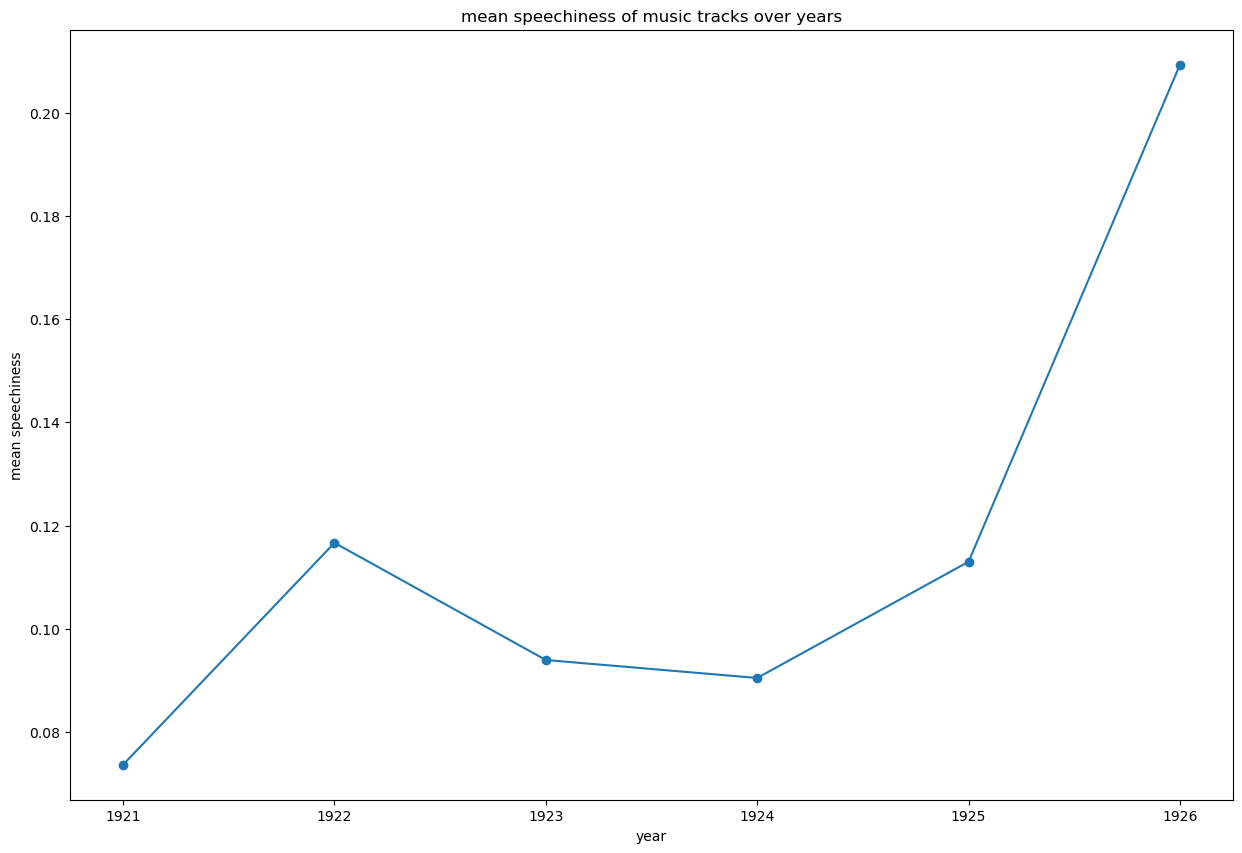

In [20]:
speechiness_by_year = df1.groupby('year')['speechiness'].mean() #groups the columns year and speechiness 
plt.figure(figsize=(15,10)) #size of the chart is assigned (15,10)
speechiness_by_year.plot(kind='line', marker='o') #grouped data is plotted as a line chart and for recognising pivotal point "o" is used
plt.title('mean speechiness of music tracks over years')# title for the chart is aligned 
plt.xlabel('year')# naming xlabel
plt.ylabel('mean speechiness')# naming ylabel
plt.show()#displays the line graph 

5.How much has the instrumentalness of the music tracks chaged over the years?

Using "plt.figure" I have given the chart size as (15,15). Then by using "sns.lineplot" I prepared the line chart with the x-variable as year and y-variable as instrumentalss and the marker as "o" to identify the deflecting point in the line graph. "plt.title" is used to give the title for the graph as "Trend of the instrumentalness over years". "plt.xbael" is used to give the label for the x-axis as "year" and "plt.ylabel" is used for giving label to the y-axis. For the output chart "plt.show()" is used.  

By the representation of this chart the trend in instrumentalness can be visualized. Which helps the straming platforms algorithm to better suggest the next song or creating playlist etc. Knowledge of the instrumentalness trends can inform collaboration with artists.

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


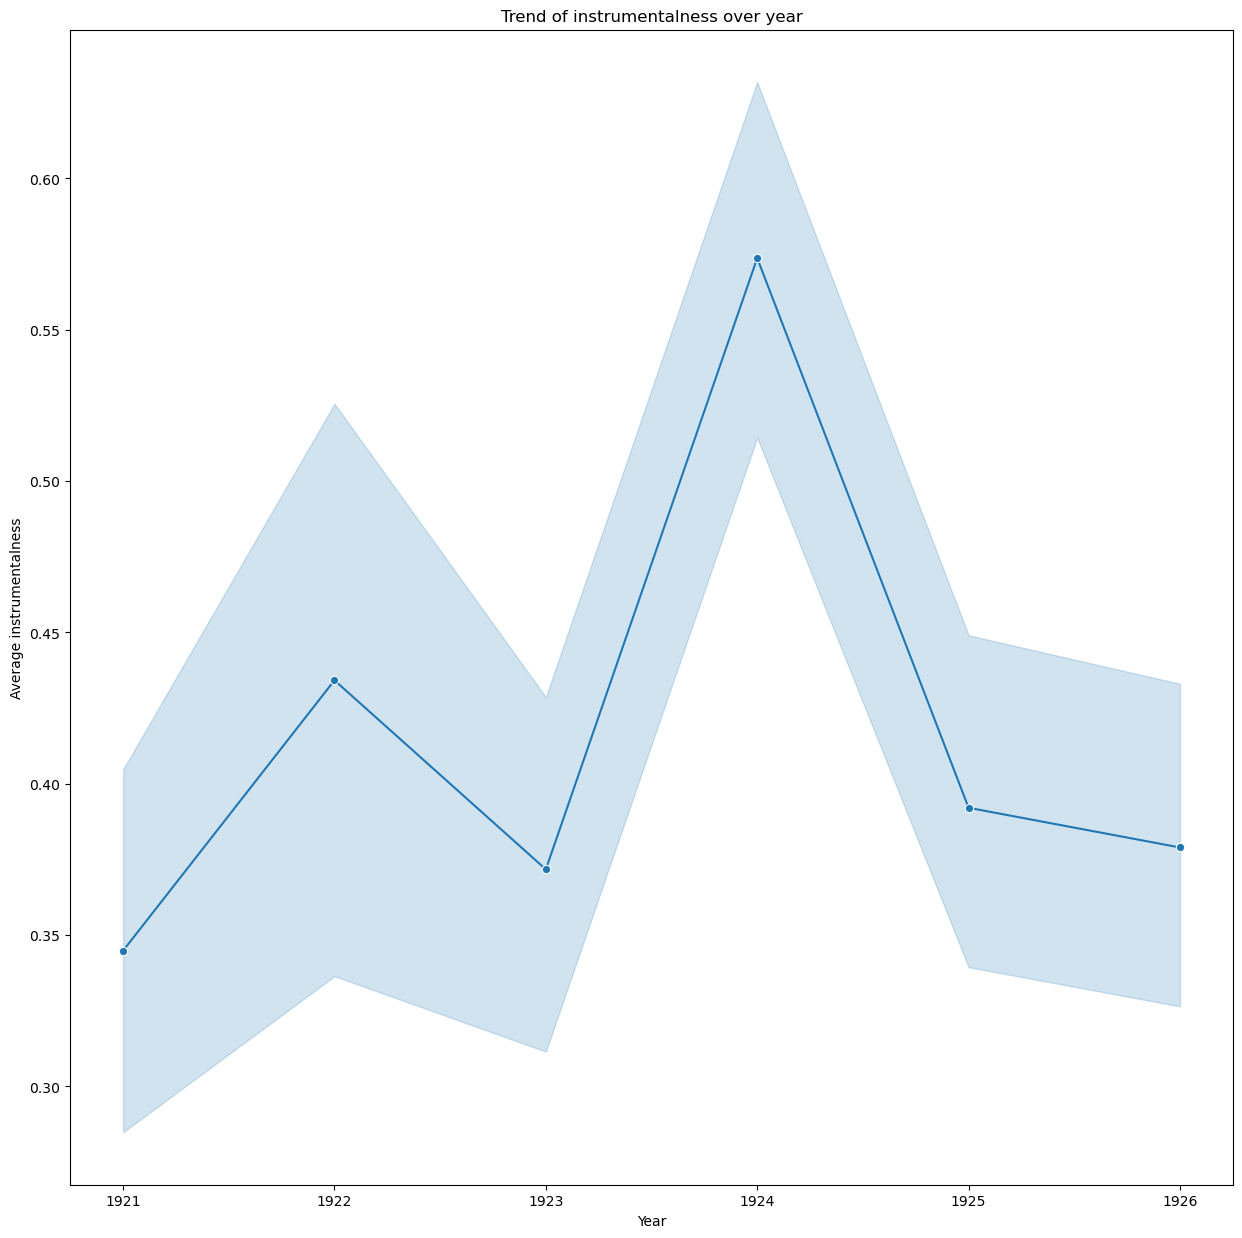

In [21]:
plt.figure(figsize=(15,15)) #chart diamension is alligned 
sns.lineplot(df1, x='year', y='instrumentalness', marker='o') #sns library is used for plotting line chart using year in x-axis and instrumentalness in y-axis
plt.title('Trend of instrumentalness over year') #title is given using plt.title
plt.xlabel('Year')#x-axis is labeled using xlabel
plt.ylabel('Average instrumentalness')#y-axis is labeled usinf ylabel
plt.show() #to display the line chart

6.How does danceability vary for tracks with different levels of instrumentalness ?

I have grouped two columns "danceability" and "instrumentalness" from the dataframe "df1". "observed=True" is used to ensure that all the unique values of dabceability are included in the result. And "mean().reset_index()" is used for finding the mean of the instrumentalness for each group. By using "plt.figure" i have given the chart size as "150,100". Then I imported the barplot from sns library to get the bar chart of the data "average_danceability_by_instrumentalness" by assigning the x-axis as danceability and y-axis as instrumentalness. Using "plt.title" the title of the chart is given as 'Average relationship between danceability and instrumentalness' and size 50 is assigned. By using "plt.xlabel" and "plt.ylabel"the labels are given as "Danceability" and "Instrumentalness". "plt.xticks" is used to rotate the values of x-axis in a 90 degree angle for better analysis. "plt.show()" is used for the displaying of output.

From making this chart the overall performance of the streaming platform cam be increased. With different levels of the instrumentalness we can tune the algorithms recommendation systems, enhanced content curation and improve user engagement in the platform. By understanding the relationship between instrumentalness and danceability the platform can offer more personalized recommendation tailored to user preference, curate a diverse musiv library that creats to various tastes and create curated playlists that aligns with popular trends. The insights from this analysis can inform strategic partnership with artists. Overall this chart gives an insights provide more compelling and engaging user experience. 

In [22]:
average_danceability_by_instrumentalness = df1.groupby('danceability', observed=True)['instrumentalness'].mean().reset_index() #to group danceability and instrumentalness also assign its mean value as average_instrumentalness_by_danceability 
plt.figure(figsize=(150,100))#chart size is given as (150,100)
sns.barplot(data=average_danceability_by_instrumentalness, x='danceability', y='instrumentalness') #imports barplot from sns library and assigning the x-axis and y-axis 
plt.title('Average relationship between danceability and instrumentalness', size=50)#title is given and size 50 is assigned  
plt.xlabel('Danceability')#x-axis is labeled 
plt.ylabel('Instrumentalness')#y-axis is labeled
plt.xticks(rotation=90)#x-axis values are rotated for better visualization
plt.show()#to display output

CONCLUSION

In conclusion, the whole pipleline is usefull for understanding the users and helps the streaming platform algorithm to make suggetions for users according to their preferences. The subsequent steps in the pipeline including grouping data, calculating averages and setting up visualisation parameters enhance our ability to derive meaningful insights from the dataset. By identifying missing values , preprocessing the data and visualizing key relationships, the pipeline helps to un cover patterns , trends, and potential correlations with dtasets. The large figure size specified in some visulization steps suggest a focus on detailed analysis. Few of the major strengths of this pipeline are comprehensive understanding, visualization, identifying trends and action insights.

However, for deeper additional steps maybe necessary depending on the specific objects and complexity of the dataset. Also some of the limitations of the pipeline is that the analysis is focused on a subset of variable and may not capture the full complexity of the dtatset, certain assumptions were made during the analysis, which may influence the interpretation of the results and the quality of insights depends on the quality of the data so it completely depends on the reliability of the data in the dataset.

Overall, the pipeline provides a strong analysis for the the improvement of the streaming platform's algorithm. This piple can perform well to prepare personal recommendations and content curation. The continued monitering and analyisi of the trends will be essential for staying competetive and meeting the evolving needs of the users in the dynamic music streaming market.